# Librerías

In [56]:
import requests
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import warnings
#warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

### Extracción de Datos

### Se analizarán los siguientes datasets correspondientes al servicio de internet en Argentina:

Penetración de Internet fijo (accesos cada 100 hogares) por provincia y a nivel nacional

Velocidad media de bajada de Internet fijo por provincia y a nivel nacional

Acceso Internet fijo por tecnología y provincia

Ingresos trimestrales de los operadores por la prestación del servicio de Internet fijo



In [57]:
#Bases de datos a extraer

guids = ['PENET-NACIO-DEL-INTER-FIJO',
         'VELOC-PROME-DE-BAJAD-DE',
         'ACCES-A-INTER-FIJO-POR',
         'INGRE-TRIME-POR-LA-PREST',
         'TOTAL-NACIO-DE-ACCES-48866']

# Authentication Key
auth_key = 'gvcXvrIygP1MltfOCEbPmvVOTkkTpjG0Wh0mAMOs'


In [58]:
#Bucle para extracción y creación de CSV
for guid in guids:
    url = f'https://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/{guid}/data.csv/?auth_key={auth_key}'

    # Send GET request to the API with the URL for each GUID
    response = requests.get(url)

    if response.status_code == 200:
        # If the response status code is 200 (success), proceed with saving the file
        result = response.content

        # Create the file path and name based on the GUID
        file_name = f'C:/Users/risis/OneDrive/Escritorio/DS_Projects/HenryLabs_PI_Analytics/{guid}.csv'

        # Open the file in binary write mode and write the content
        with open(file_name, 'wb') as file:
            file.write(result)

        # Print a success message
        print(f'File "{file_name}" saved successfully.')
    else:
        # If there is an error in the request, print the error message
        print(f'Error in the request for GUID "{guid}":', response.status_code)

File "C:/Users/risis/OneDrive/Escritorio/DS_Projects/HenryLabs_PI_Analytics/PENET-NACIO-DEL-INTER-FIJO.csv" saved successfully.
File "C:/Users/risis/OneDrive/Escritorio/DS_Projects/HenryLabs_PI_Analytics/VELOC-PROME-DE-BAJAD-DE.csv" saved successfully.
File "C:/Users/risis/OneDrive/Escritorio/DS_Projects/HenryLabs_PI_Analytics/ACCES-A-INTER-FIJO-POR.csv" saved successfully.
File "C:/Users/risis/OneDrive/Escritorio/DS_Projects/HenryLabs_PI_Analytics/INGRE-TRIME-POR-LA-PREST.csv" saved successfully.
File "C:/Users/risis/OneDrive/Escritorio/DS_Projects/HenryLabs_PI_Analytics/TOTAL-NACIO-DE-ACCES-48866.csv" saved successfully.


### **Importante**: 
### Se encontrarón inconsistencias entre los datos extraídos a través de la API y las bases de datos en forma xlxs. 
### Se decidió utilizar descargar las bases xlxs de la fuente de Datos oficial (ENACOM) e ingestarlas manualmente. 

## Exploración de datos

In [59]:
#Creacion de DataFrames
df1_acceso_nacional = pd.read_excel('Data\Internet_Penetracion.xlsx', sheet_name= "Penetracion-totales")

df2_acceso_por_provincia= pd.read_excel('Data\Internet_Penetracion.xlsx', sheet_name= "Penetracion-hogares")

df3_tech_nacional = pd.read_excel("Data\Internet_Accesos-por-tecnologia.xlsx", sheet_name= "Totales")
df4_tech_por_provincia = pd.read_excel("Data\Internet_Accesos-por-tecnologia.xlsx", sheet_name= "Accesos Por Tecnología")

df5_vel_nacional = pd.read_excel("Data\historico_velocidad_internet.xlsx", sheet_name= "Totales")
df6_vel_por_provincia = pd.read_excel("Data\historico_velocidad_internet.xlsx", sheet_name= "Velocidad % por prov")

df7_ingresos = pd.read_excel("Data\Internet_Ingresos.xlsx")

### Dado el conocimiento del analista con respecto a las desigualdades regionales en cuánto a infraestructura y accesibilidad, 
### se decide agrupar a la provincias según la regionalización actual a fin de trabajar y enriquecer el analisis de los DataSets. 

In [60]:
# Definición de Regiones: 
regiones = {
    'Región NOA': ['Santiago Del Estero', 'Tucumán', 'Catamarca', 'Jujuy', 'Salta'],
    'Región NEA': ['Chaco', 'Corrientes', 'Formosa', 'Misiones'],
    'Región AMBA': ['Capital Federal'],
    'Región Buenos Aires': ['Buenos Aires'],
    'Región Centro': ['Santa Fe', 'Córdoba', 'Entre Ríos'],
    'Región Cuyo': ['La Rioja', 'Mendoza', 'San Juan', 'San Luis'],
    'Región Patagonia': ['La Pampa', 'Neuquén', 'Río Negro', 'Chubut', 'Santa Cruz', 'Tierra Del Fuego']
}

# Ejemplo de cómo acceder a la lista de provincias de la Región NOA
provincias_noa = regiones['Región NOA']

# Ejemplo de cómo imprimir las provincias de la Región NOA
print("Provincias de la Región NOA:")
for provincia in provincias_noa:
    print(provincia)


Provincias de la Región NOA:
Santiago Del Estero
Tucumán
Catamarca
Jujuy
Salta


In [61]:
#Función para evaluar nulos, duplicados y tipos de dato
def analisis(df):
    nulos = df.isnull().sum()
    duplicados = df.duplicated(subset = None).any()
    tipos = df.dtypes
    #Outliers o valores atípicos
    stats = df.describe()

    print("Nulos: \n" + str(nulos))
    print("---------"*5)
    print("Duplicados: \n" + str(duplicados))
    print("---------"*5)
    print("Tipos de Datos: \n" + str(tipos))
    print("---------"*5)
    print("Estadisticas Variables Númericas:\n", stats.to_string())
    
    
    return 

### #1 Acceso a Internet cada 100 hogares y 100 habitantes a nivel Nacional

In [62]:
#Exploración del DataSet
analisis(df1_acceso_nacional)
df1_acceso_nacional.head()

Nulos: 
Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64
---------------------------------------------
Duplicados: 
False
---------------------------------------------
Tipos de Datos: 
Año                               int64
Trimestre                         int64
Accesos por cada 100 hogares    float64
Accesos por cada 100 hab        float64
Periodo                          object
dtype: object
---------------------------------------------
Estadisticas Variables Númericas:
                Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab
count    36.000000  36.000000                     36.000000                 36.000000
mean   2018.000000   2.500000                     60.745449                 18.760923
std       2.618615   1.133893                      8.512409                  2.781875
min    2014.000000   1.000000             

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,77.210000,24.150000,Oct-Dic 2022
1,2022,3,76.640000,23.950000,Jul-Sept 2022
2,2022,2,75.965424,23.720442,Abr-Jun 2022
3,2022,1,73.878803,23.049171,Ene-Mar 2022
4,2021,4,73.176397,22.810702,Oct-Dic 2021


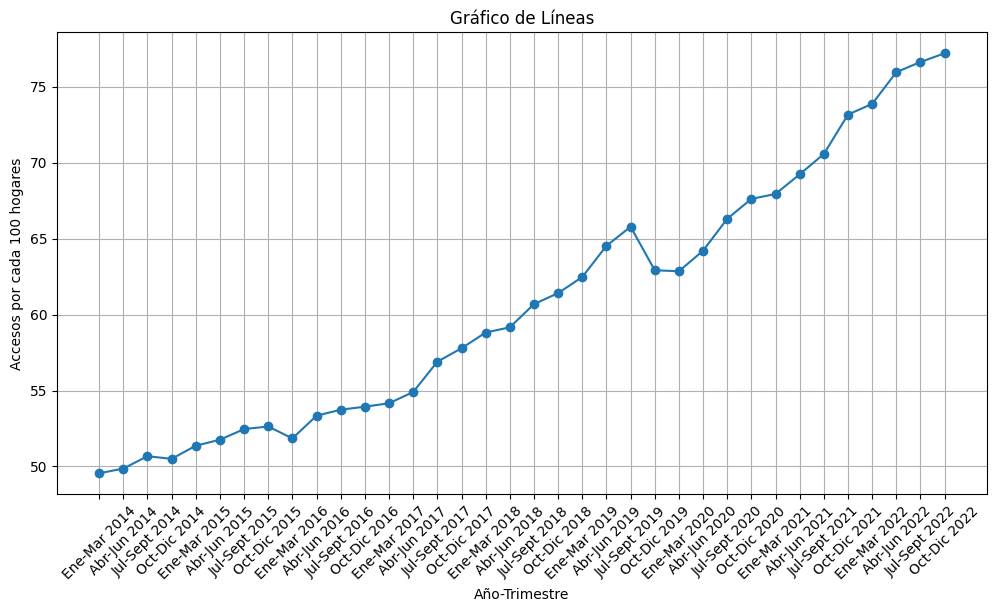

In [63]:
#Grafico de la evolución trimestral del acceso cada 100 hogares
# Tamaño del gráfico
plt.figure(figsize=(12, 6))

# Gráfico de líneas con 'Año-Trimestre' en el eje x
plt.plot(df1_acceso_nacional['Periodo'][::-1], df1_acceso_nacional['Accesos por cada 100 hogares'][::-1], marker='o', linestyle='-')

# Configuración del gráfico
plt.title("Gráfico de Líneas")
plt.xlabel("Año-Trimestre")
plt.ylabel("Accesos por cada 100 hogares")

# Rotar las etiquetas en el eje x para que sean legibles
plt.xticks(rotation=45)

# Muestra el gráfico
plt.grid(True)  # Agrega una cuadrícula
plt.show()

##Conclusiones:
- No se observan valores nulos, ni duplicados ni outliers. 
- Se observa una tendencia creciente en el acceso al servicio a lo largo del tiempo.
- Dicha tendencia sufre sólo una caída en la segunda mitad del 2019, recuperandose recién hacia Junio 2020. 
- Se decide estudiar el acceso cada por hogares y no por habitantes debido a que se trata de internet fijo y no móvil. 


### #2 Acceso a Internet cada 100 hogares por provincia

In [64]:
#Exploración del DataSet
analisis(df2_acceso_por_provincia)
df2_acceso_por_provincia.head()

Nulos: 
Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64
---------------------------------------------
Duplicados: 
False
---------------------------------------------
Tipos de Datos: 
Año                               int64
Trimestre                         int64
Provincia                        object
Accesos por cada 100 hogares    float64
dtype: object
---------------------------------------------
Estadisticas Variables Númericas:
                Año   Trimestre  Accesos por cada 100 hogares
count   864.000000  864.000000                    864.000000
mean   2018.000000    2.500000                     49.620138
std       2.583484    1.118682                     23.319298
min    2014.000000    1.000000                      9.347208
25%    2016.000000    1.750000                     32.216632
50%    2018.000000    2.500000                     46.386588
75%    2020.000000    3.250000   

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57


In [65]:
#Se observa el comportamiento de la variable en la columna Capital Federal
df2_acceso_por_provincia[df2_acceso_por_provincia["Provincia"] == "Capital Federal"].head(10)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
1,2022,4,Capital Federal,122.730000
25,2022,3,Capital Federal,122.280000
49,2022,2,Capital Federal,121.310000
73,2022,1,Capital Federal,111.797863
97,2021,4,Capital Federal,111.270026
121,2021,3,Capital Federal,111.271055
145,2021,2,Capital Federal,110.144402
169,2021,1,Capital Federal,108.419939
193,2020,4,Capital Federal,108.311075
217,2020,3,Capital Federal,107.675901


In [66]:
# Creo la columna "Región" 
df2_acceso_por_provincia['Región'] = df2_acceso_por_provincia['Provincia'].map({provincia: region for region, provincias in regiones.items() for provincia in provincias})
df2_acceso_por_provincia.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Región
0,2022,4,Buenos Aires,78.94,Región Buenos Aires
1,2022,4,Capital Federal,122.73,Región AMBA
2,2022,4,Catamarca,65.77,Región NOA
3,2022,4,Chaco,43.62,Región NEA
4,2022,4,Chubut,85.57,Región Patagonia


In [67]:
#Chequeo que todos los registros tengan Región asignada
df2_acceso_por_provincia[df2_acceso_por_provincia["Región"].isnull()]

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Región


In [103]:
#Calculo promedios por región 
promedio_por_region = df2_acceso_por_provincia.groupby(["Región","Año"])["Accesos por cada 100 hogares"].mean()

# Filtra los resultados para mostrar solo los años 2022
acceso_prom_region = promedio_por_region.loc[promedio_por_region.index.get_level_values('Año').isin([2022])]

# Ahora, 'acceso_prom_region' contiene los promedios solo para los años 2022 
print(acceso_prom_region)


Región               Año 
Región AMBA          2022    119.529466
Región Buenos Aires  2022     77.677037
Región Centro        2022     76.501078
Región Cuyo          2022     65.570628
Región NEA           2022     46.089572
Región NOA           2022     57.180567
Región Patagonia     2022     78.085604
Name: Accesos por cada 100 hogares, dtype: float64


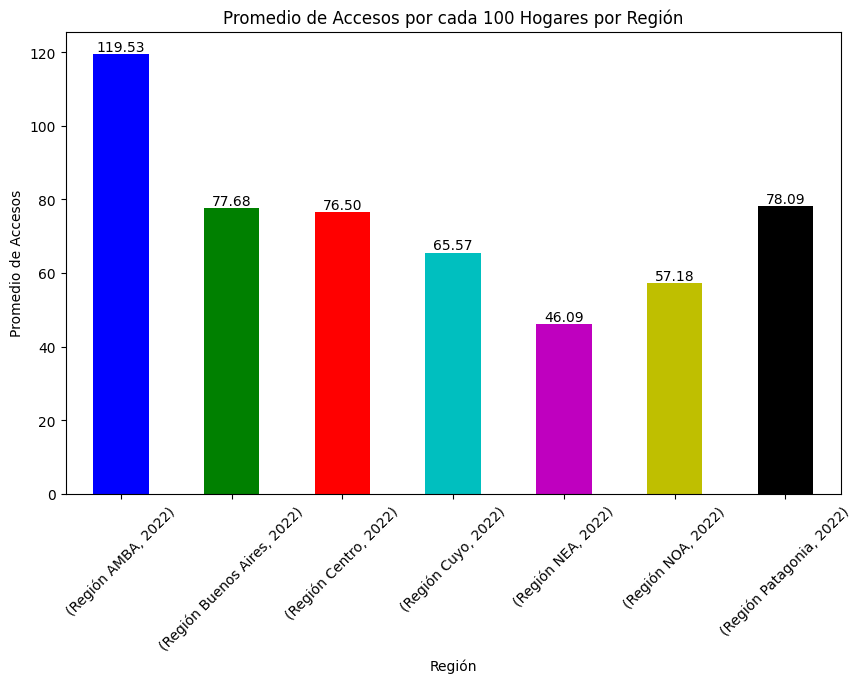

In [104]:
#Gráfico 
# Tamaño del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras para mostrar el promedio por región
acceso_prom_region.plot(kind='bar', color= ['b', 'g', 'r', 'c', 'm', 'y', 'k'])

# Configuración del gráfico
plt.title("Promedio de Accesos por cada 100 Hogares por Región")
plt.xlabel("Región")
plt.ylabel("Promedio de Accesos")
plt.xticks(rotation=45)

# Agrega los valores de promedio en la parte superior de las columnas
for i, v in enumerate(acceso_prom_region):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

# Muestra el gráfico

plt.show()

In [105]:
acceso_prom_region.to_csv("Data/acceso_por_region.csv")

#Conclusiones:
- No se observan valores nulos, ni duplicados ni outliers. 
- Se observan valores superiores a 100 en la columna accesos: corresponden a jurisdicciones como Capital Federal
donde el acceso al servicio es tan alto que hay más de un acceso por hogar. No se consideran valores atípicos. 
- Se observan diferencias importantes en el acceso al servicio a nivel regional.
- Las regiones NEA y NOA son las mas postergadas, mientras que la Capital Federal muestra un acceso muy alto al servicio. 

### #3 Tecnología a nivel Nacional

In [70]:
#Exploración del DataSet
analisis(df3_tech_nacional)
df3_tech_nacional.head()

Nulos: 
Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64
---------------------------------------------
Duplicados: 
False
---------------------------------------------
Tipos de Datos: 
Año              int64
Trimestre        int64
ADSL             int64
Cablemodem       int64
Fibra óptica     int64
Wireless         int64
Otros            int64
Total            int64
Periodo         object
dtype: object
---------------------------------------------
Estadisticas Variables Númericas:
                Año  Trimestre          ADSL    Cablemodem  Fibra óptica       Wireless          Otros         Total
count    36.000000  36.000000  3.600000e+01  3.600000e+01  3.600000e+01      36.000000      36.000000  3.600000e+01
mean   2018.000000   2.500000  2.992507e+06  4.175792e+06  8.035492e+05  257299.166667  149495.222222  8.378642e+06
std       2.618615   1.133893  8.721436

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022
1,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
2,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
3,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
4,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021


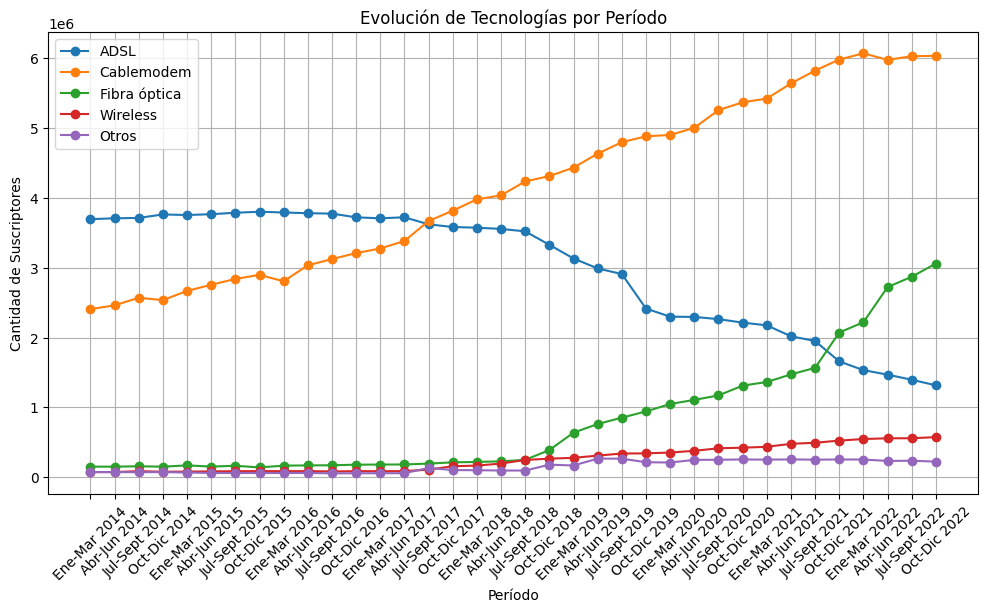

In [106]:
# Graficos de la evolución de cada tecnología 

# Filtra el DataFrame solo para las tecnologías de interés y la columna de período
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
df_filtrado3 = df3_tech_nacional[['Periodo'] + tecnologias]

# Tamaño del gráfico
plt.figure(figsize=(12, 6))

# Gráfico de líneas para mostrar la evolución de cada tecnología por período
for tecnologia in tecnologias:
    plt.plot(df_filtrado3['Periodo'], df_filtrado3[tecnologia], marker='o', label=tecnologia)

# Configuración del gráfico
plt.title("Evolución de Tecnologías por Período")
plt.xlabel("Período")
plt.ylabel("Cantidad de Suscriptores")
plt.xticks(rotation=45)
plt.legend()

# Invierte el eje x
plt.gca().invert_xaxis()

# Muestra el gráfico
plt.grid(True)  # Agrega una cuadrícula
plt.show()


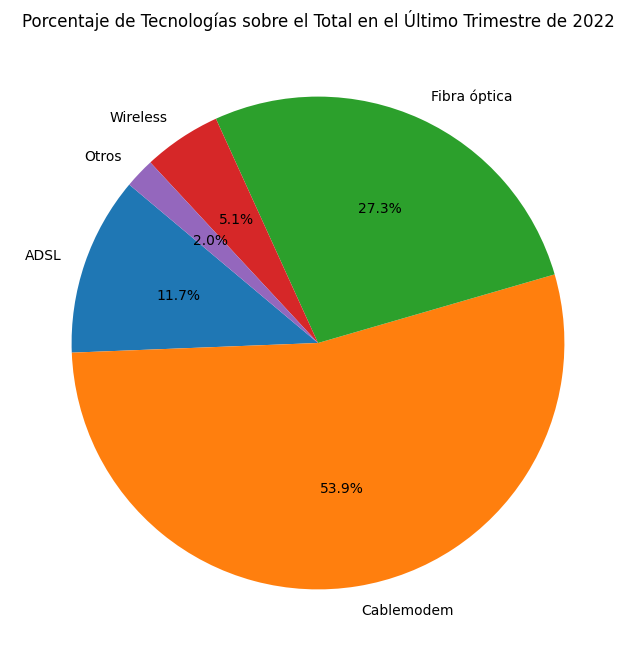

In [72]:
#Gráfico de torta % Tecnología / Total en el último trimestre 2022

# Filtra el DataFrame para el último trimestre del año 2022
df_ultimo_trimestre_2022 = df3_tech_nacional[(df3_tech_nacional['Año'] == 2022) & (df3_tech_nacional['Trimestre'] == 4)]

# Filtra el DataFrame solo para las tecnologías de interés
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
df_filtrado = df_ultimo_trimestre_2022[tecnologias]

# Calcula el porcentaje de cada tecnología sobre el total
porcentaje_tecnologias = (df_filtrado / df_ultimo_trimestre_2022['Total'].values[0]) * 100
# Supongamos que los porcentajes están en la primera fila del DataFrame 'df'
porcentajes = porcentaje_tecnologias.iloc[0].tolist()


plt.figure(figsize=(8, 8))
plt.pie(porcentajes, labels=tecnologias, autopct='%1.1f%%', startangle=140)
plt.title("Porcentaje de Tecnologías sobre el Total en el Último Trimestre de 2022")

# Muestra el gráfico de pastel
plt.show()


In [108]:
df_ultimo_trimestre_2022.to_csv("Data/tech_presente.csv")

#Conclusiones:
- No se observan valores nulos, ni duplicados ni outliers. 
- Se observa que a partir del 2018 hay un marcado crecimiento del desarrollo de la fibre óptica, al mismo tiempo que un descenso
en el uso de la tecnología ADSL.
- Las tecnología CableModem es por lejos la más utilizada, duplicando la cantidad de usuarios que la fibra óptica. 
- Entre CableModem y Fibra Óptica se cubre el 80% de la demanda de internet a nivel nacional


### #4 Tecnologías por provincia

In [73]:
df4_tech_por_provincia = pd.read_excel("Data\Internet_Accesos-por-tecnologia.xlsx", sheet_name= "Accesos Por Tecnología")

In [74]:
#Exploración del DataSet
analisis(df4_tech_por_provincia)
df4_tech_por_provincia.head()

Nulos: 
Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64
---------------------------------------------
Duplicados: 
False
---------------------------------------------
Tipos de Datos: 
Año              object
Trimestre        object
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object
---------------------------------------------
Estadisticas Variables Númericas:
                ADSL    Cablemodem  Fibra óptica       Wireless         Otros         Total
count  8.640000e+02  8.640000e+02  8.640000e+02     864.000000    864.000000  8.640000e+02
mean   1.255457e+05  1.739913e+05  3.262331e+04   10720.798611   6228.967593  3.491101e+05
std    2.520514e+05  4.276313e+05  1.325430e+05   18723.092796  10740.931282  7.494854e+05
min    6.12000

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0
1,2022,4,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0,1551926.0
2,2022,4,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0,70909.0
3,2022,4,Chaco,24582.0,61265.0,47285.0,7957.0,2574.0,143663.0
4,2022,4,Chubut,45450.0,73923.0,9815.0,30721.0,8850.0,168759.0


In [75]:
df4_tech_por_provincia.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
861,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
862,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
863,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0
864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
865,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Elimino las ultimas dos filas
df4_tech_por_provincia.drop(df4_tech_por_provincia.index[-2:], inplace= True)

In [77]:
#Reviso que no haya mas nulos
df4_tech_por_provincia.isnull().sum()

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

In [78]:
#Observo los valores de la columna Año
df4_tech_por_provincia["Año"].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=object)

In [79]:
#Cambio tipo de datos a Int de Año y Trimestre
# Cambiar el tipo de datos de "Año" y "Trimestre" a entero
df4_tech_por_provincia['Año'] = df4_tech_por_provincia['Año'].astype('Int64')
df4_tech_por_provincia['Trimestre'] = df4_tech_por_provincia['Trimestre'].astype('Int64')

In [80]:
df4_tech_por_provincia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0
1,2022,4,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0,1551926.0
2,2022,4,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0,70909.0
3,2022,4,Chaco,24582.0,61265.0,47285.0,7957.0,2574.0,143663.0
4,2022,4,Chubut,45450.0,73923.0,9815.0,30721.0,8850.0,168759.0


In [81]:
# Creo la columna "Región"
df4_tech_por_provincia['Región'] = df4_tech_por_provincia['Provincia'].map({provincia: region for region, provincias in regiones.items() for provincia in provincias})

In [82]:
#Quiero ver la distribución tecnológica porcentual por Región para el ultimo trimestre del 2022

tecnologias2 = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']

df_tech_region = df4_tech_por_provincia[(df4_tech_por_provincia["Trimestre"] == 4) & (df4_tech_por_provincia["Año"] == 2022)].groupby(["Región", "Año"])[tecnologias2].sum().reset_index()
df_tech_region

,Región,Año,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,Región AMBA,2022,138753.0,1238196.0,138548.0,4603.0,31826.0,1551926.0
1,Región Buenos Aires,2022,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0
2,Región Centro,2022,371393.0,1004850.0,656749.0,132158.0,43175.0,2208325.0
3,Región Cuyo,2022,88628.0,198574.0,182308.0,137471.0,10431.0,617412.0
4,Región NEA,2022,105559.0,245818.0,134040.0,45806.0,16002.0,547225.0
5,Región NOA,2022,146789.0,262034.0,327267.0,28310.0,13503.0,777903.0
6,Región Patagonia,2022,138343.0,320738.0,122514.0,94711.0,34352.0,710658.0


In [83]:
# Lista de columnas que deseas convertir a porcentajes
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Itera sobre las columnas y calcula el porcentaje para cada fila
for columna in columnas:
    df_tech_region[columna] = (df_tech_region[columna] / df_tech_region['Total']) * 100

# Ahora 'df' contiene los valores en porcentaje en lugar de valores absolutos en las columnas originales
df_tech_region.drop("Total", axis =1,inplace= True)
df_tech_region

# Ahora 'df_tech_region' contiene los valores de porcentaje en lugar de valores absolutos


,Región,Año,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
0,Región AMBA,2022,8.940697,79.784474,8.927488,0.296599,2.050742
1,Región Buenos Aires,2022,6.797305,57.715127,31.267023,2.709470,1.511075
2,Región Centro,2022,16.817860,45.502813,29.739690,5.984536,1.955102
3,Región Cuyo,2022,14.354758,32.162316,29.527771,22.265683,1.689472
4,Región NEA,2022,19.289872,44.920828,24.494495,8.370597,2.924209
5,Región NOA,2022,18.869833,33.684662,42.070412,3.639271,1.735821
6,Región Patagonia,2022,19.466888,45.132539,17.239516,13.327226,4.833830


In [109]:
df_tech_region.to_csv("Data/tech_region_presente.csv")

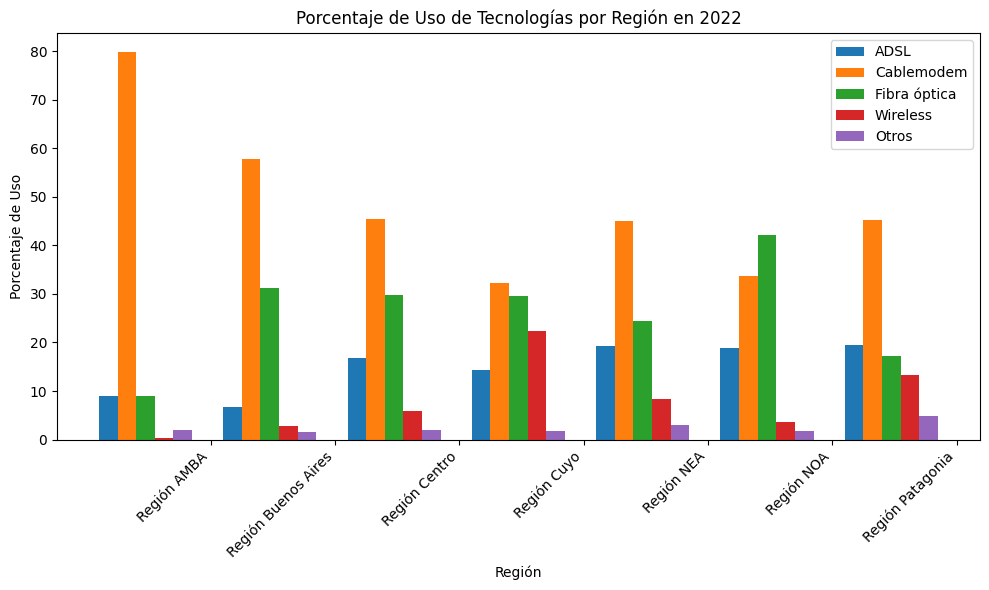

In [84]:
# Gráfico
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Crear un gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.15  # Ancho de las barras

for i, tecnologia in enumerate(tecnologias):
    x = range(len(df_tech_region))
    y = df_tech_region[tecnologia]

    # Ajusta el índice de las barras para agruparlas
    x = [pos + i * width for pos in x]

    ax.bar(x, y, width, label=tecnologia)

# Configuración del gráfico
ax.set_xlabel('Región')
ax.set_ylabel('Porcentaje de Uso')
ax.set_title('Porcentaje de Uso de Tecnologías por Región en 2022')
ax.set_xticks([pos + 1.5 * width for pos in x])
ax.set_xticklabels(df_tech_region['Región'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

#Conclusiones:
- Se eliminaron registros nulos 
- Se modificaron los tipos de datos de Año y Trimestre para su posterior trabajo de unión con otros DataSets
- Las tecnología CableModem es por lejos la más utilizada. Sin embargo, se observan diferencias regionales: La fibra óptica tiene mucho mas prescencia (porcentual) en el NOA y Cuyo que en el AMBA o la Patagonia.

### #5 Velocidad de Bajada - Nacional 

In [85]:
#Exploración del DataSet
analisis(df5_vel_nacional)
df5_vel_nacional.head()

Nulos: 
Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
Trimestre.1               0
dtype: int64
---------------------------------------------
Duplicados: 
False
---------------------------------------------
Tipos de Datos: 
Año                         int64
Trimestre                   int64
Mbps (Media de bajada)    float64
Trimestre.1                object
dtype: object
---------------------------------------------
Estadisticas Variables Númericas:
                Año  Trimestre  Mbps (Media de bajada)
count    36.000000  36.000000               36.000000
mean   2018.000000   2.500000               24.180555
std       2.618615   1.133893               23.636842
min    2014.000000   1.000000                3.617127
25%    2016.000000   1.750000                5.338574
50%    2018.000000   2.500000               14.604770
75%    2020.000000   3.250000               41.092500
max    2022.000000   4.000000              106.560000


,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,4,106.56,Oct-Dic 2022
1,2022,3,62.46,Jul-Sept 2022
2,2022,2,58.44,Abr-Jun 2022
3,2022,1,55.11,Ene-Mar 2022
4,2021,4,52.34,Oct-Dic 2021


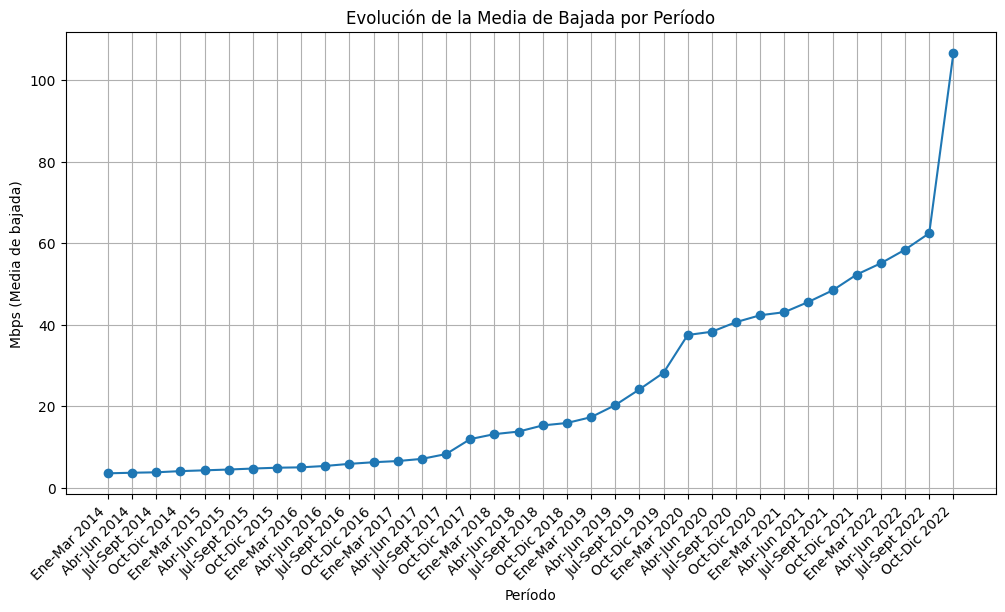

In [110]:
#Gráfico
# Ordena el DataFrame por año y trimestre
df5_vel_nacional.sort_values(by=['Año', 'Trimestre'], inplace=True)

# Crea un gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(df5_vel_nacional['Trimestre.1'], df5_vel_nacional['Mbps (Media de bajada)'], marker='o', linestyle='-')

# Configuración del gráfico
plt.title("Evolución de la Media de Bajada por Período")
plt.xlabel("Período")
plt.ylabel("Mbps (Media de bajada)")
plt.xticks(rotation=45, ha='right')

# Muestra el gráfico
plt.grid(True)  # Agrega una cuadrícula
plt.show()


#Conclusiones:
- No se encuentran valores nulos ni atípicos ni duplicados
- Se observa una tendencia alcista en la velocidad media de bajada, con un crecimeinto exponencial en el último año

### #6 Velocidad de Bajada -  por provincia

In [87]:
#Exploración del DataSet
analisis(df6_vel_por_provincia)
df6_vel_por_provincia.head()

Nulos: 
Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64
---------------------------------------------
Duplicados: 
False
---------------------------------------------
Tipos de Datos: 
Año                         int64
Trimestre                   int64
Provincia                  object
Mbps (Media de bajada)    float64
dtype: object
---------------------------------------------
Estadisticas Variables Númericas:
                Año   Trimestre  Mbps (Media de bajada)
count   864.000000  864.000000              864.000000
mean   2018.000000    2.500000               15.375182
std       2.583484    1.118682               18.320956
min    2014.000000    1.000000                2.573729
25%    2016.000000    1.750000                4.316775
50%    2018.000000    2.500000                7.416094
75%    2020.000000    3.250000               19.709719
max    2022.000000    4.000000              182.860000


,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.00
1,2022,4,Capital Federal,182.86
2,2022,4,Catamarca,83.33
3,2022,4,Chaco,104.02
4,2022,4,Chubut,15.92


In [88]:
# Creo la columna "Región":
df6_vel_por_provincia['Región'] =df6_vel_por_provincia['Provincia'].map({provincia: region for region, provincias in regiones.items() for provincia in provincias})
df6_vel_por_provincia

,Año,Trimestre,Provincia,Mbps (Media de bajada),Región
0,2022,4,Buenos Aires,111.000000,Región Buenos Aires
1,2022,4,Capital Federal,182.860000,Región AMBA
2,2022,4,Catamarca,83.330000,Región NOA
3,2022,4,Chaco,104.020000,Región NEA
4,2022,4,Chubut,15.920000,Región Patagonia
...,...,...,...,...,...
859,2014,1,Santa Cruz,3.315991,Región Patagonia
860,2014,1,Santa Fe,3.147407,Región Centro
861,2014,1,Santiago Del Estero,2.949472,Región NOA
862,2014,1,Tierra Del Fuego,3.446888,Región Patagonia


In [89]:
#Velocidad promedio por Región al fin del 2022
df6_prom_region = df6_vel_por_provincia.groupby(["Región","Año"])["Mbps (Media de bajada)"].mean().reset_index()
df6_prom_region_2022 = df6_prom_region[df6_prom_region["Año"] == 2022]
df6_prom_region_2022

,Región,Año,Mbps (Media de bajada)
8,Región AMBA,2022,116.525000
17,Región Buenos Aires,2022,77.300000
26,Región Centro,2022,57.535000
35,Región Cuyo,2022,29.232500
44,Región NEA,2022,54.041250
53,Región NOA,2022,44.781000
62,Región Patagonia,2022,26.261667


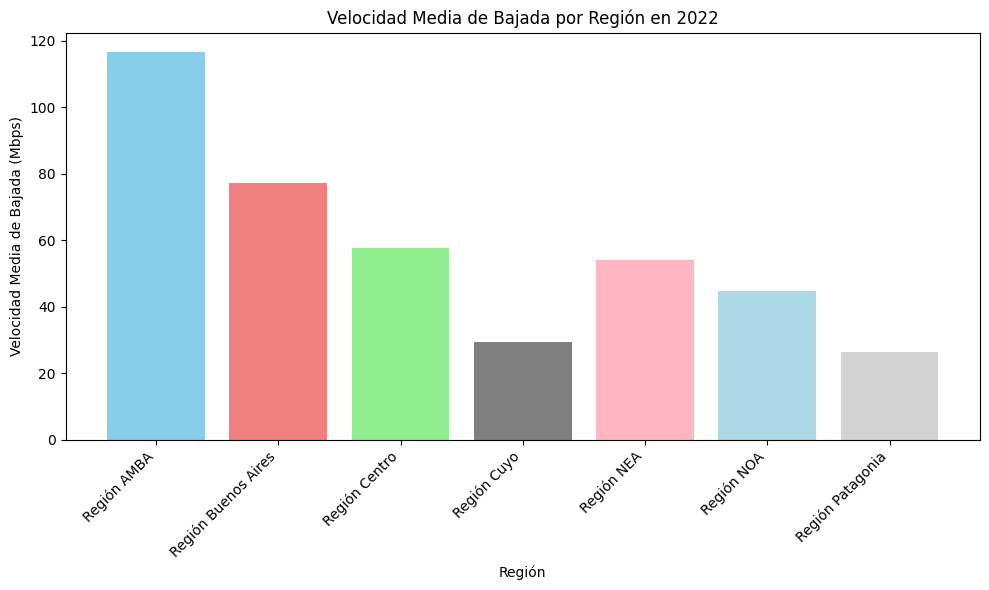

In [90]:
# Gráfico
regiones = df6_prom_region_2022['Región']
velocidades = df6_prom_region_2022['Mbps (Media de bajada)']

# Crear un gráfico de barras

df6_prom_region_2022 = df6_prom_region_2022.sort_values(by='Mbps (Media de bajada)', ascending = True)

# Paleta de colores personalizada para cada región
colores = ['skyblue', 'lightcoral', 'lightgreen', 'grey', 'lightpink', 'lightblue', 'lightgray']


plt.figure(figsize=(10, 6))
plt.bar(regiones, velocidades, color= colores)
plt.xlabel('Región')
plt.ylabel('Velocidad Media de Bajada (Mbps)')
plt.title('Velocidad Media de Bajada por Región en 2022')
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [111]:
df6_prom_region_2022.to_csv("Data/promedio_vel_region_presente.csv")

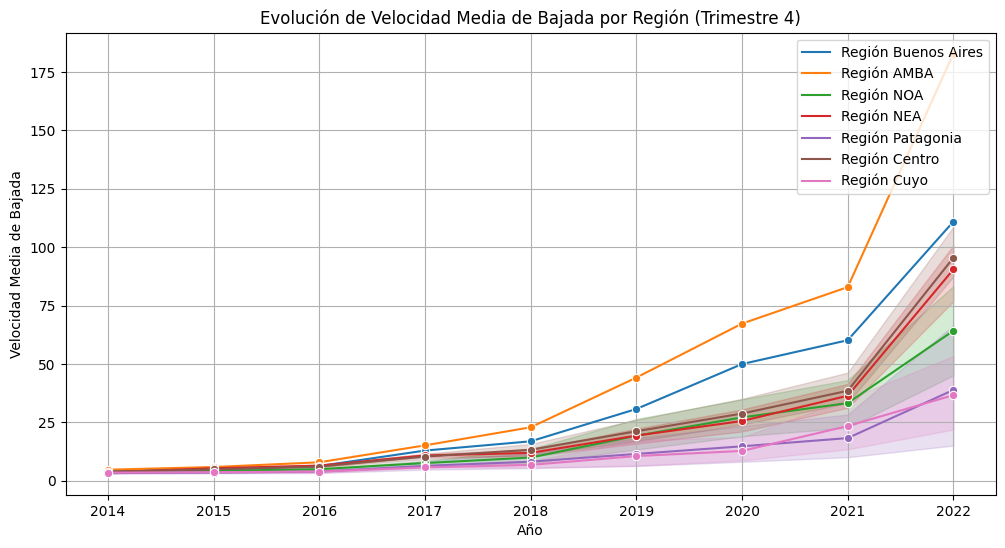

In [91]:
#Evolución de la velocida de la bajada por Región
# Filtra los datos para el trimestre 4
df_trimestre_4 = df6_vel_por_provincia[df6_vel_por_provincia['Trimestre'] == 4]

# Crea un gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_trimestre_4, x='Año', y='Mbps (Media de bajada)', hue='Región', marker='o')

# Configuración del gráfico
plt.title("Evolución de Velocidad Media de Bajada por Región (Trimestre 4)")
plt.xlabel("Año")
plt.ylabel("Velocidad Media de Bajada")
plt.grid(True)
plt.legend(loc='upper right')

# Muestra el gráfico
plt.show()

In [92]:
#Evolución % en los ultimos 2 años por región

In [93]:
# Filtra los datos para los años 2020 y 2022 en el trimestre 4
df_2020 = df6_vel_por_provincia[(df6_vel_por_provincia['Año'] == 2020) & (df6_vel_por_provincia['Trimestre'] == 4)]
df_2022 = df6_vel_por_provincia[(df6_vel_por_provincia['Año'] == 2022) & (df6_vel_por_provincia['Trimestre'] == 4)]
# Realiza un merge de ambos DataFrames en función de la provincia
merged_df = pd.merge(df_2020, df_2022, on='Provincia', suffixes=('_2020', '_2022'))
# Calcula el aumento porcentual
merged_df['Aumento %'] = ((merged_df['Mbps (Media de bajada)_2022'] - merged_df['Mbps (Media de bajada)_2020']) / merged_df['Mbps (Media de bajada)_2020']) * 100
# Agrupa por Región y calcula la media del % de aumento
df_final = merged_df.groupby("Región_2022")["Aumento %"].mean().reset_index()
df_final

,Región_2022,Aumento %
0,Región AMBA,171.607320
1,Región Buenos Aires,121.962795
2,Región Centro,234.730997
3,Región Cuyo,208.986040
4,Región NEA,256.005764
5,Región NOA,144.899933
6,Región Patagonia,131.410731


In [112]:
df_final.to_csv("Data/aumento_porcentual_region_2anios.csv")

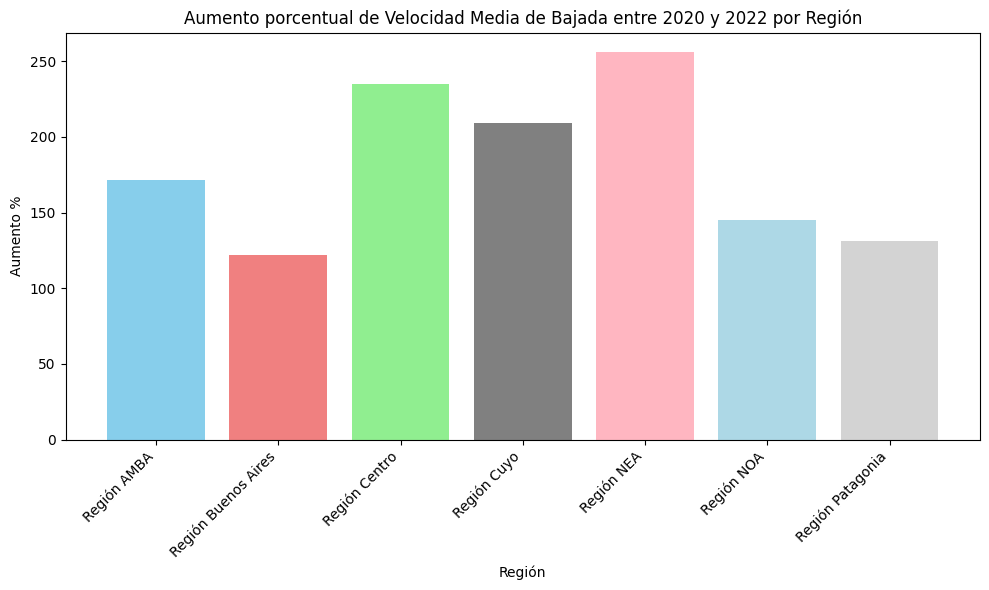

In [94]:
#Gráfico
# Datos
regiones_2022 = df_final['Región_2022']
aumento_porcentual = df_final['Aumento %']

df_final = df_final.sort_values(by='Aumento %', ascending = False)

# Crear un gráfico de barras
# Paleta de colores personalizada para cada región
colores = ['skyblue', 'lightcoral', 'lightgreen', 'grey', 'lightpink', 'lightblue', 'lightgray']

plt.figure(figsize=(10, 6))
plt.bar(regiones_2022, aumento_porcentual, color=colores)
plt.xlabel('Región')
plt.ylabel('Aumento %')
plt.title('Aumento porcentual de Velocidad Media de Bajada entre 2020 y 2022 por Región')
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Conclusiones:
- No se encuentran valores nulos ni atípicos ni duplicados
- Se observa una marcada diferencia en cuanto a la velocidad media de bajada, comparando por regiones. AMBA y Buenos Aires presentan velocidades de bajada promedio muy por encima del resto del país.
- Sin embargo, se observa un aumento en la velocidad de bajada media en todas las regiones.
- En los últimos dos años, se observa un mayor crecimiento de la velocidad de bajada media en las regioens del NEA y Centro del país.

### #7 Ingresos de operadores

In [95]:
#Exploración del DataSet
analisis(df7_ingresos)
df7_ingresos.head()

Nulos: 
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64
---------------------------------------------
Duplicados: 
False
---------------------------------------------
Tipos de Datos: 
Año                            int64
Trimestre                      int64
Ingresos (miles de pesos)    float64
Periodo                       object
dtype: object
---------------------------------------------
Estadisticas Variables Númericas:
                Año  Trimestre  Ingresos (miles de pesos)
count    36.000000  36.000000               3.600000e+01
mean   2018.000000   2.500000               2.193842e+07
std       2.618615   1.133893               1.930189e+07
min    2014.000000   1.000000               2.984054e+06
25%    2016.000000   1.750000               6.384892e+06
50%    2018.000000   2.500000               1.486522e+07
75%    2020.000000   3.250000               3.246178e+07
max    2022.000000   4.00000

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,7.244348e+07,Oct-Dic 2022
1,2022,3,6.408678e+07,Jul-Sept 2022
2,2022,2,6.041950e+07,Abr-Jun 2022
3,2022,1,5.521931e+07,Ene-Mar 2022
4,2021,4,4.546789e+07,Oct-Dic 2021


In [96]:
df7_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,7.244348e+07,Oct-Dic 2022
1,2022,3,6.408678e+07,Jul-Sept 2022
2,2022,2,6.041950e+07,Abr-Jun 2022
3,2022,1,5.521931e+07,Ene-Mar 2022
4,2021,4,4.546789e+07,Oct-Dic 2021


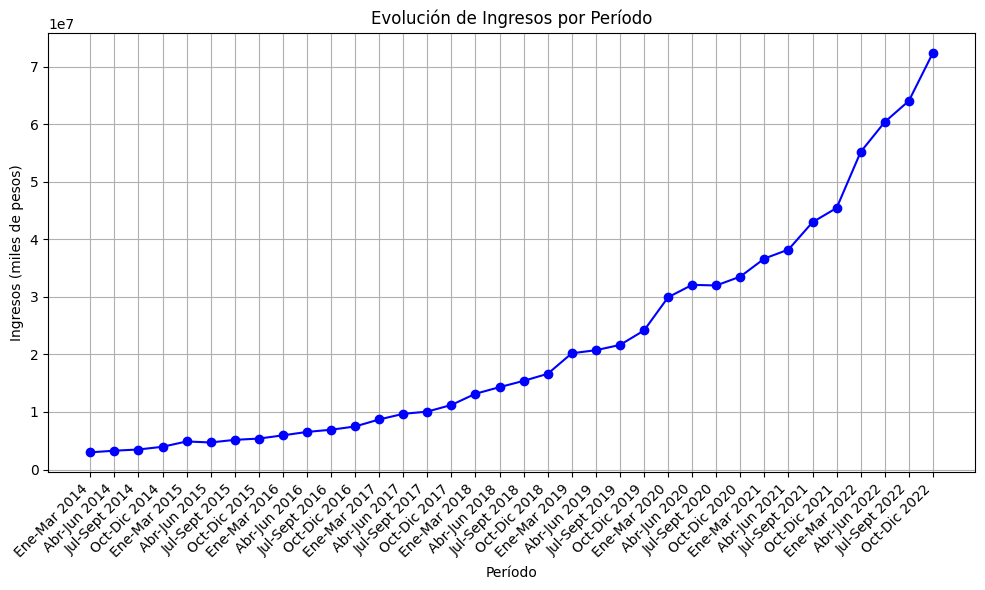

In [97]:
#Gráfico
import matplotlib.pyplot as plt
# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(df7_ingresos["Periodo"], df7_ingresos["Ingresos (miles de pesos)"], marker='o', color='b', linestyle='-')
plt.xlabel('Período')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Evolución de Ingresos por Período')
plt.grid(True)

# Rotar etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha="right")

# Invertir el eje x
plt.gca().invert_xaxis()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [98]:
data_telecom= yf.download(['TEO'], start='2017-01-02', end='2023-11-01')['Adj Close']
data_telecom = pd.DataFrame(data_telecom)

[*********************100%%**********************]  1 of 1 completed


In [113]:
data_telecom.to_csv("Data/Telecom.csv")

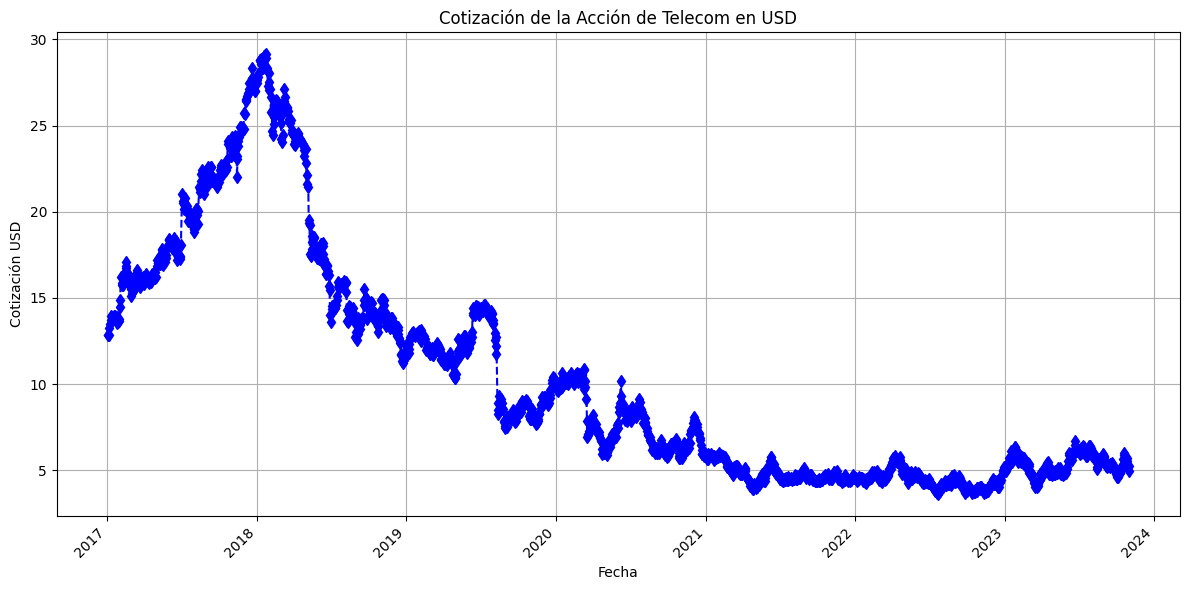

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que data_telecom es una serie de pandas con fechas como índice
# y cotizaciones de la acción de Telecom en USA como valores

# Crear un DataFrame a partir de la serie (si aún no lo tienes en formato DataFrame)
df = pd.DataFrame(data_telecom, columns=['Adj Close'])

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear el gráfico de línea
plt.plot(df.index, df['Adj Close'], marker='d', linestyle='--', color='b', lw = 1.5)

# Configurar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Cotización USD')
plt.title('Cotización de la Acción de Telecom en USD')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha="right")
# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusiones:
- No se encuentran valores nulos ni atípicos ni duplicados
- Se observa una clara tendencia alcista en el aumento de ingresos de los operadores. Sin embargo, el país vive hace muchos años en un contexto de inflación y, dado que los ingresos están evaluados en moneda loca, el analisis de la rentabilidad de los operadores debe ser realizado con mayor rigurosidad metodológica. 
- A modo de contraste, se observa la evolución de la cotización de las acciones de Telecom (principal operador del país) en el mercado de valores de Estados Unidos. 

In [102]:
#Exporto DF a CSV: 
df1_acceso_nacional.to_csv('Data\Internet_Penetracion_nac_ok.csv')

df2_acceso_por_provincia.to_csv('Data\Internet_Penetracion_ok.csv')

df3_tech_nacional.to_csv("Data\Internet_Accesos-por-tecnologia_nac__ok.csv")
df4_tech_por_provincia.to_csv("Data\Internet_Accesos-por-tecnologia_ok.csv")

df5_vel_nacional.to_csv("Data\historico_velocidad_internet_nac__ok.csv")
df6_vel_por_provincia.to_csv("Data\historico_velocidad_internet_ok.csv")

df7_ingresos.to_csv("Data\Internet_Ingresos_ok.csv")

## **Conclusiones Generales** 
- Se observa un fuerte aumento de la conectividad a nivel nacional, con diferencias regionales, pero con todas las provincias del país avanzando hacia un escenario de mayor conectividad, mejor calidad de la conexión y modernización de las conexiones. 
- El Índice de Internet Inclusivo (3i) 2022 , elaborado por The Economist Intelligence Unit (EIU) en colaboración con
Meta, posiciona a Argentina como el cuarto país de la región, después de Chile, Brasil y México, con mejor penetración de red en Latinoamérica. El índice mide el ambiente para la inclusión en internet a través de cuatro grandes
ejes: la disponibilidad, la asequibilidad, la relevancia y la preparación de la red.
- Existen fuertes diferencias en cuanto a la velocidad media de bajada entre el centro y el interior del país, pero se observa una mejora más acelerada de la velocidad en los últimos dos años (2021-2022) por parte de las regiones más postergadas.
- Uno de los aspectos más interesantes de la infraestructura nacional es el desarrollo de La Red Federal de Fibra
Óptica (REFEFO), que nació en 2010 como parte del plan “Argentina Conectada”. Cuenta con 32.585 kilómetros de fibra óptica
iluminada que conecta a 1.118 localidades y 20.750.904 ciudadanos a lo ancho y largo del país. Se prevé alcanzar
los 38.808 kilómetros iluminados y conectar a más de 22 millones de argentinos a la Red en el año 2023.
Dicha tecnología es el principal potencial que tiene el sector para seguir desarrollandose. 
- El porcentaje de ciudadanos que utiliza internet está en línea con los mejores números de la región. 

- Por último, en cuánto a los operadores, el mercado está concentrado en  grandes empresas nacionales y transnacionales, como Telecom, Telefónica y Claro. Se enriquece el analisis con el aspecto financiero (negativo) de Telecom, el operador más importante, pero se recuerda que el país vive una situación macro-financiera compleja que podría estar distorcionando el analisis. 